<a href="https://colab.research.google.com/github/DaffaHamsy/Pemograman_python/blob/main/Assignment_6_Tugas_Python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-30d35e44740e>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  calculated_data0_szl_df[col + '_skew'] = [skew(data0_szl_df[col])]
<ipython-input-7-30d35e44740e>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  calculated_data0_szl_df[col + '_median'] = [data0_szl_df[col].median()]
<ipython-input-7-30d35e44740e>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

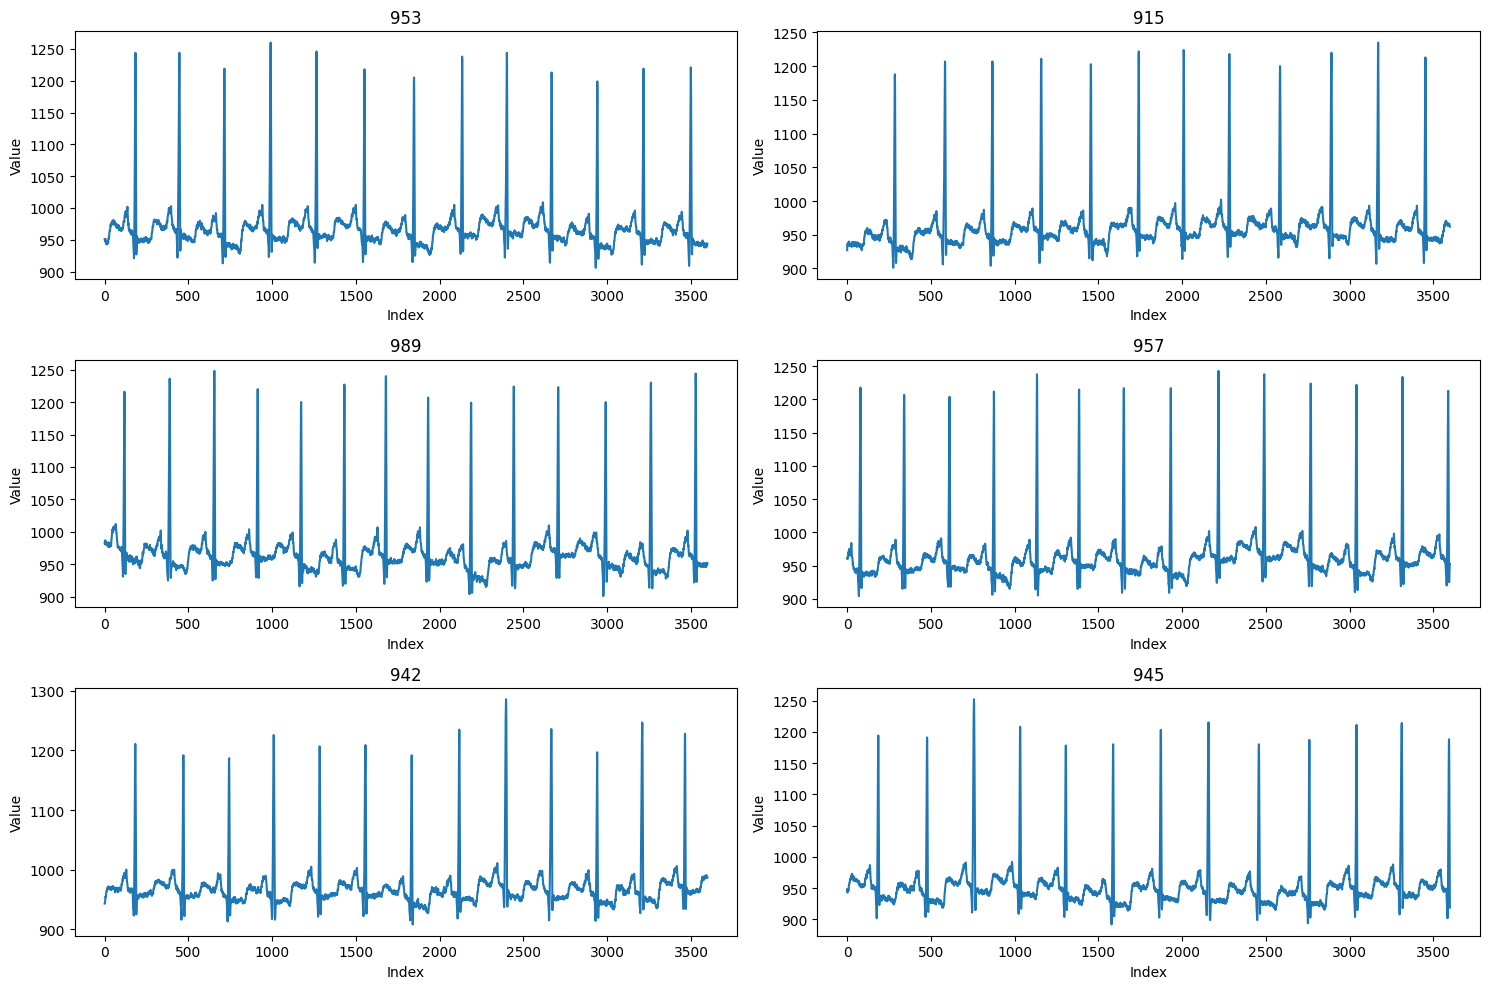

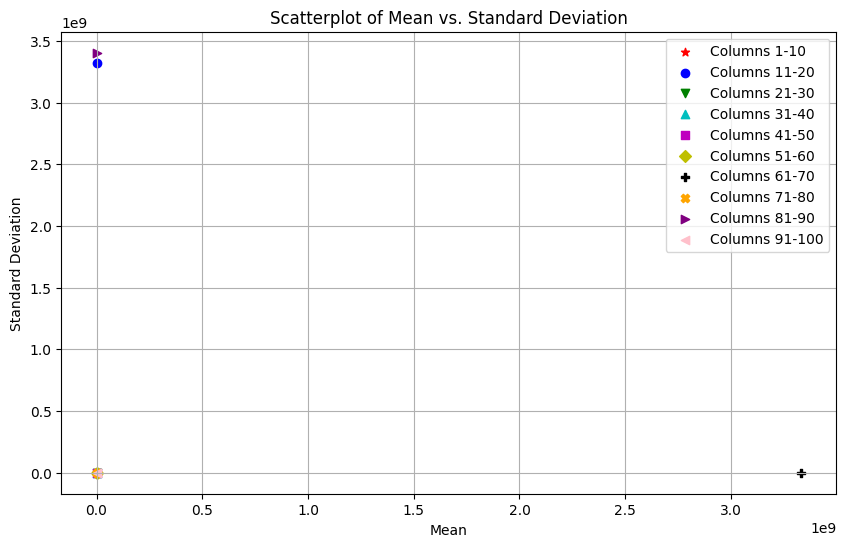

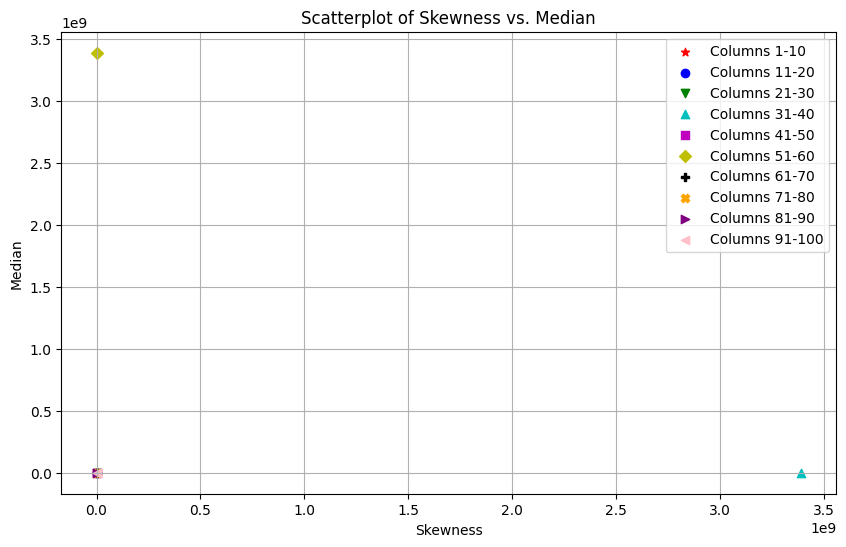

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke file CSV
file_path = '/content/drive/My Drive/data0-SZL.csv'

# 1. Baca dataset pada Google Colab ke variabel yang berbeda
data0_szl_df = pd.read_csv(file_path)

# 2. Lakukan perhitungan setiap kolomnya
calculated_data0_szl_df = pd.DataFrame()
for col in data0_szl_df.columns:
    calculated_data0_szl_df[col + '_mean'] = [data0_szl_df[col].mean()]
    calculated_data0_szl_df[col + '_std'] = [data0_szl_df[col].std()]
    calculated_data0_szl_df[col + '_skew'] = [skew(data0_szl_df[col])]
    calculated_data0_szl_df[col + '_median'] = [data0_szl_df[col].median()]
    calculated_data0_szl_df[col + '_energy'] = [np.sum(data0_szl_df[col]**2)]
    calculated_data0_szl_df[col + '_min'] = [data0_szl_df[col].min()]
    calculated_data0_szl_df[col + '_max'] = [data0_szl_df[col].max()]

# 3. Plot sinyal di atas dengan multiplot 2x3
def plot_signals(df, cols):
    num_plots = len(cols)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.plot(df[col])
        plt.title(col)
        plt.xlabel('Index')
        plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

# Pilih 6 kolom secara bebas
selected_columns = data0_szl_df.columns[:6]
plot_signals(data0_szl_df, selected_columns)

# 4. Plot scatterplot untuk rata-rata
def scatterplot_mean_std(df):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
    markers = ['*', 'o', 'v', '^', 's', 'D', 'P', 'X', '>', '<']
    for i in range(10):
        start_idx = i * 10
        end_idx = (i + 1) * 10
        plt.scatter(df.iloc[:, start_idx], df.iloc[:, start_idx + 1], color=colors[i], marker=markers[i], label=f'Columns {start_idx+1}-{end_idx}')
    plt.xlabel('Mean')
    plt.ylabel('Standard Deviation')
    plt.title('Scatterplot of Mean vs. Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

scatterplot_mean_std(calculated_data0_szl_df)

# 5. Plot scatterplot untuk skewness dan median
def scatterplot_skew_median(df):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
    markers = ['*', 'o', 'v', '^', 's', 'D', 'P', 'X', '>', '<']
    for i in range(10):
        start_idx = i * 10
        end_idx = (i + 1) * 10
        plt.scatter(df.iloc[:, start_idx + 2], df.iloc[:, start_idx + 3], color=colors[i], marker=markers[i], label=f'Columns {start_idx+1}-{end_idx}')
    plt.xlabel('Skewness')
    plt.ylabel('Median')
    plt.title('Scatterplot of Skewness vs. Median')
    plt.legend()
    plt.grid(True)
    plt.show()

scatterplot_skew_median(calculated_data0_szl_df)
